## LAB-4: REGULARISATION 


In [1]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import  Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn import metrics

In [3]:
# Reading the data:

college1 = pd.read_csv("C:/Users/nisha/OneDrive/Documents/Datasets/College.csv")

# Labeling rows by college:
college = college1.set_index(['Unnamed: 0'], append=False, verify_integrity=True)
college.rename_axis([ 'College'], inplace=True)

In [4]:
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
# Converting the Private variable which is categorical in nature to 0s and 1s.
college = college.replace({'Private': {'Yes': 1, 
                                'No': 0}})
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
# PRE-PROCESSING
college.isnull().sum().sum() # Checking for null values

0

In [7]:
print("The number of rows and columns :",college.shape)

The number of rows and columns : (777, 18)


In [8]:
# Statistical summary 
college.describe()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,0.727156,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,0.445708,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,0.000000,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,0.000000,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1.000000,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,1.000000,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,1.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [9]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    int64  
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

<AxesSubplot:>

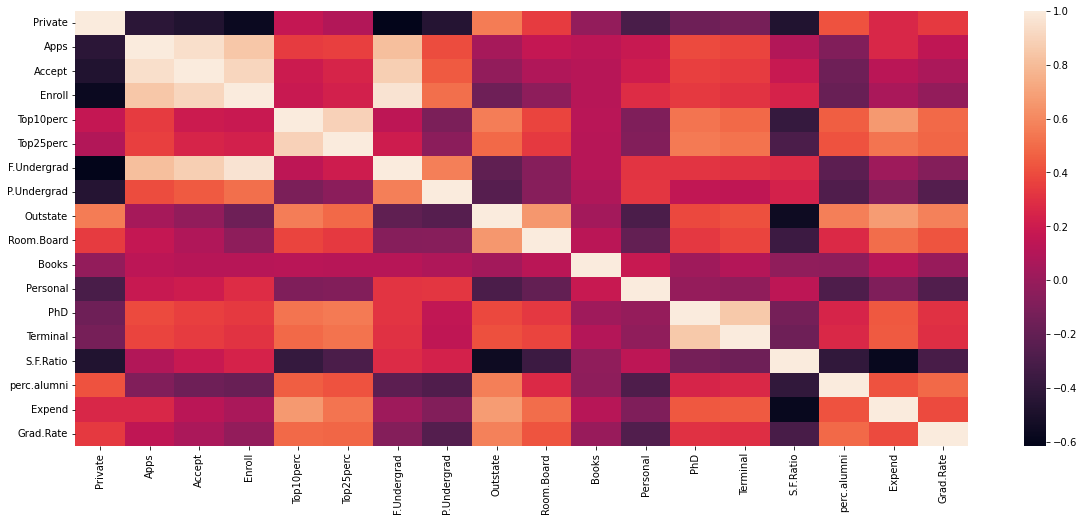

In [10]:
# Selecting variables using correlation in order to fit the linear regression model
corr=college.corr(method="pearson")
plt.figure(figsize=(20,8))
sns.heatmap(corr)

#### INTERPRETATION
* The response variable "application" is least correlated with Outstate, S.F Ratio, perc.alumni, Grad.Rate.
* Thus we neglect these variables inlcuding the categorical variables for fitting the model

In [12]:
# Training and testing data
x = college.drop(columns=["Apps"])
y = college.Apps
X = sm.add_constant(x)

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=33)

In [13]:
print(x_train.shape)
print(y_train.shape)

(543, 18)
(543,)


### 1. Fit a linear model using least squares on the training set and report the test error obtained.

In [16]:
# Fitting Linear Regression
lr = LinearRegression()
model_lr = lr.fit(x_train,y_train)
model1=sm.OLS(y_train,x_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Apps   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     412.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.33e-290
Time:                        21:33:40   Log-Likelihood:                -4541.2
No. Observations:                 543   AIC:                             9118.
Df Residuals:                     525   BIC:                             9196.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -226.9280    495.542     -0.458      0.647   -1200.418     746.561
Private      -333.0805    168.590     -1.976      0.049    -664.274      -1.887
Accept          1.7007      0.046     36.647      0.000       1.610       1.792
Enroll         -1.0455      0.225     -4.648      0.000      -1.487      -0.604
Top10perc      52.1300      6.894      7.562      0.000      38.587      65.673
Top25perc     -17.7109      5.480     -3.232      0.001     -28.476      -6.946
F.Undergrad     0.0596      0.038      1.550      0.122      -0.016       0.135
P.Undergrad    -0.0082      0.050     -0.165      0.869      -0.106       0.090
Outstate       -0.0986      0.024     -4.144      0.000      -0.145      -0.052
Room.Board      0.1428      0.059      2.438      0.015       0.028       0.258
Books          -0.0599      0.271     -0.221      0.825      -0.592       0.472
Personal        0.0432      0.079      0.549      0.583      -0.111       0.198
PhD            -6.1327      5.501     -1.115      0.265     -16.939       4.673
Terminal       -5.1492      6.041     -0.852      0.394     -17.017       6.719
S.F.Ratio       8.2078     16.543      0.496      0.620     -24.292      40.707
perc.alumni     1.8457      5.090      0.363      0.717      -8.154      11.846
Expend          0.0819      0.015      5.636      0.000       0.053       0.110
Grad.Rate       7.2314      3.636      1.989      0.047       0.089      14.374
==============================================================================
Omnibus:                      322.063   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5049.812
Skew:                           2.278   Prob(JB):                         0.00
Kurtosis:                      17.228   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Prediction for test data
y_pred_lr = model_lr.predict(x_test)

# Mean score error for test data
MSE_lr = mean_squared_error(y_pred_lr,y_test)
print("Mean square error for the test data is :",round(MSE_lr,2))

Mean square error for the test data is : 1098645.92


In [17]:
model_lr.score(x_test,y_test)

0.920534297174913

### 2. Fit a ridge regression model on the training set.  Report the test error obtained.


In [18]:
# Fitting the Ridge regression model
rr=Ridge(alpha=0.2)
model_rr=rr.fit(x_train,y_train)

# Prediction for test data
y_pred_rr = model_rr.predict(x_test)

In [19]:
# R-squared value:
print("R-squared value is:",model_rr.score(x_train,y_train))  

# Mean score error for test error for ridge regression:
MSE_rr = mean_squared_error(y_pred_rr,y_test)
print("Mean square error for the test data is :",round(MSE_rr,2))

R-squared value is: 0.9303245614399953
Mean square error for the test data is : 1098757.5


### 3. Fit a lasso model on the training set. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [20]:
# Fitting the Lasso regression model for training data
# Regularisation parameter (alpha) is assumed to be 0.1
lsr = Lasso(alpha=0.1,selection="cyclic")  # If selection is random, coefficient is updated every iteration rather than looping over features sequentially by default
model_lsr = lsr.fit(x_train,y_train)

# Prediction for test data
y_pred_lsr = model_lsr.predict(x_test)

In [21]:
# Mean Square Error
MSE_lsr=mean_squared_error(y_pred_lsr,y_test)
print("R-squared value is:",model_lsr.score(x_train,y_train))  # R-squared value
print("Mean sqaure error for Lasso regression is :",round(MSE_lsr,2))

R-squared value is: 0.9303245657615774
Mean sqaure error for Lasso regression is : 1098741.75


<AxesSubplot:>

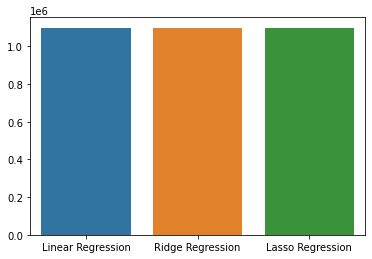

In [22]:
# BAR PLOT

x1 = ["Linear Regression","Ridge Regression","Lasso Regression"]
y1 = [MSE_lr,MSE_rr,MSE_lsr]
sns.barplot(x=x1,y=y1)

#### Interpretation
* By comparing the Mean Square Error of the three types of Regression, we can note that MSE of Linear regression is lesser than the other regression which is not significantly less. Thus we can conclude which moodel is the better one of all.

## PROGRAM 2

### 1. Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [23]:
# list of alphas to check:
r_alphas =[0.01,0.01,0.1,1.0,1.15]
# Number of folds
k=10

# Initiate the cross validation over alphas
rm = RidgeCV(alphas=r_alphas, scoring='r2',cv=k)
# Fit the model with the best alpha
ridge_model = rm.fit(x_train, y_train)
y_pred_cv = ridge_model.predict(x_test)
# Mean square error
mse_ridge_cv = mean_squared_error(y_pred_cv,y_test)



In [28]:
print("The best lambda :",ridge_model.alpha_)
print("R-squared value is:",ridge_model.score(x_train,y_train))  # R-squared value
print("Mean square error is :",round(mse_ridge_cv,2))

The best lambda : 1.15
R-squared value is: 0.9303241529547327
Mean square error is : 1099278.29


### 2. Fit a lasso model on the training set, with λ chosen by cross validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [29]:
# list of alphas to check:
r_alphas =[0.01,0.01,0.1,1.0,1.15,5,10,100]
# Number of folds
k=10

# Initiate the cross validation over alphas
ls = LassoCV(alphas=r_alphas,cv=k)
# Fit the model with the best alpha
lasso_model = ls.fit(x_train, y_train)

# Prediction
y_pred_cv = ridge_model.predict(x_test)

# Mean square error
mse_ridge_cv = mean_squared_error(y_pred_cv,y_test)



In [30]:
print("The best lambda :",ridge_model.alpha_)
print("R-squared value is:",lasso_model.score(x_train,y_train))  # R-squared value
print("Mean square error is :",round(mse_ridge_cv,2))

The best lambda : 1.15
R-squared value is: 0.9296662671206357
Mean square error is : 1099278.29
